In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.multivariate.manova import MANOVA

sns.set(style="whitegrid")


In [2]:
DATA_PATH = "../Data/processed/fused_ppg_acc_features.csv"

fused_df = pd.read_csv(DATA_PATH)

print("Fused feature shape:", fused_df.shape)
fused_df.head()



Fused feature shape: (1158, 29)


,subject_id,activity,hr_bpm,hrv,peak_count,R_ratio,red_ac,ir_ac,ppg_mean,ppg_std,...,ax_rms,ay_rms,az_rms,sma,ax_energy,ay_energy,az_energy,ax_entropy,ay_entropy,az_entropy
0,s12,run,99.709182,0.007644,9,1.580212,98.586438,256.296416,-1.116858,68.371286,...,0.885659,0.973383,1.063934,2.341158,1959.412897,2366.793253,2827.628172,2.212839,3.306854,2.456894
1,s12,run,100.190840,0.011256,8,1.036670,91.672293,219.962447,2.855715,59.774673,...,0.964208,1.238615,1.235612,2.775671,2322.382918,3832.352997,3813.791349,2.711380,3.213158,2.860193
2,s12,run,93.541203,0.036374,8,1.550534,93.461807,202.217577,2.343746,59.500541,...,0.961333,1.306386,1.200691,2.766003,2308.557564,4263.198379,3601.265495,2.204404,2.552857,2.353520
3,s12,run,86.248203,0.019813,7,1.098686,85.358685,185.129674,-2.086325,58.417425,...,0.965035,1.500704,1.392992,3.060616,2326.371625,5625.781375,4847.190902,2.584731,2.832697,2.625304
4,s12,run,85.836910,0.017000,7,-0.962195,73.637724,182.366085,-0.376455,58.327658,...,0.865292,1.424049,1.335625,2.864869,1870.330840,5065.739702,4456.168899,2.685710,3.077220,2.545995


In [3]:
#CLASS DISTRIBUTION:
fused_df["activity"].value_counts()



activity
run     386
sit     386
walk    386
Name: count, dtype: int64

In [4]:
#Descriptive Statistics
desc_stats = fused_df.groupby("activity").mean(numeric_only=True)
desc_stats



,hr_bpm,hrv,peak_count,R_ratio,red_ac,ir_ac,ppg_mean,ppg_std,ppg_rms,ppg_energy,...,ax_rms,ay_rms,az_rms,sma,ax_energy,ay_energy,az_energy,ax_entropy,ay_entropy,az_entropy
activity,,,,,,,,,,,,,,,,,,,,,
run,93.830243,0.016876,7.818653,0.876318,169.583540,380.311398,0.009764,69.767477,69.806909,1.263705e+07,...,0.984958,1.382298,1.035123,2.733981,2594.683093,5311.596071,2810.981998,2.219166,2.642391,2.654119
sit,77.033714,0.023256,6.417098,1.051600,130.984217,325.221746,0.009638,54.866866,54.894851,9.813778e+06,...,0.016338,0.019317,0.018954,0.043063,0.771186,1.229096,1.010492,4.411488,4.127466,4.738836
walk,92.107524,0.017554,7.673575,0.901490,127.450841,285.816732,0.003548,44.308297,44.337241,6.668891e+06,...,0.622078,0.819361,0.808242,1.781667,1130.337630,1858.712599,1779.798601,2.739143,2.829348,2.894026


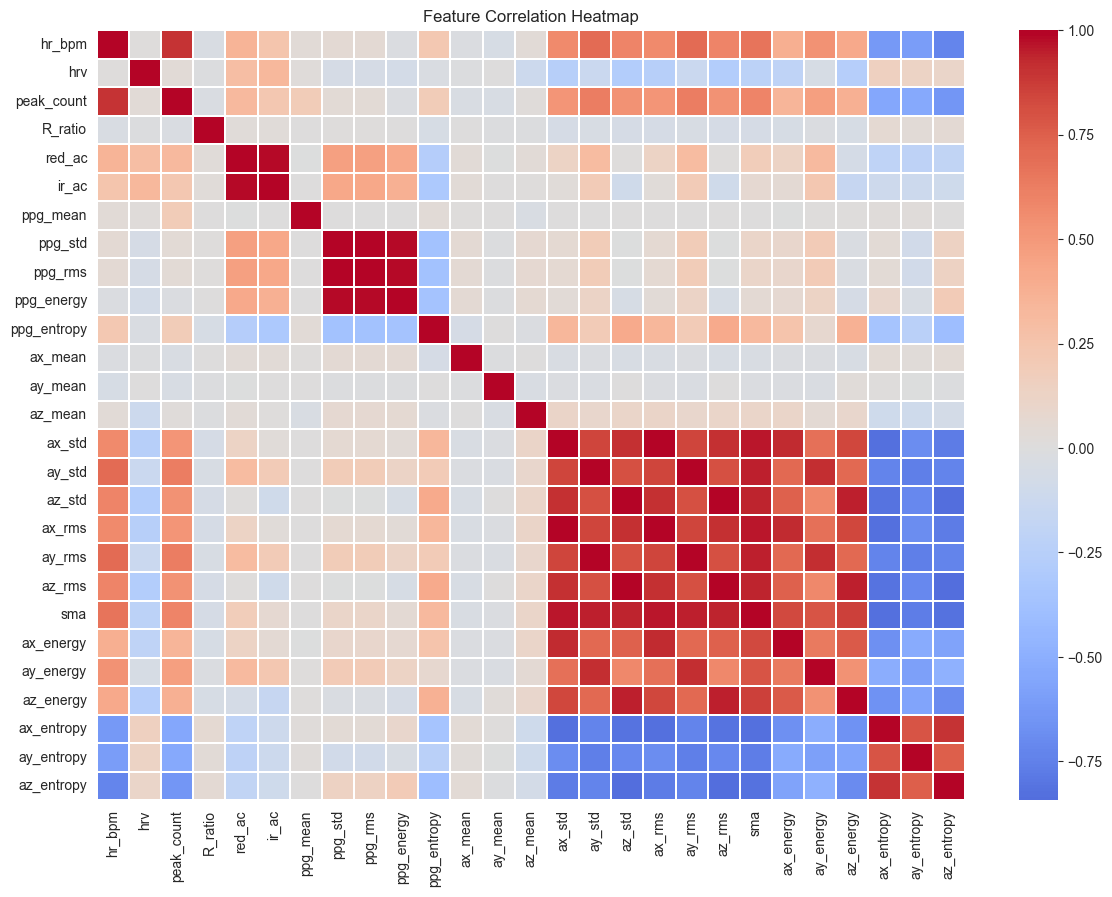

In [5]:
#correlation heatmap:
# ==========================================
# FIGURE 7: Feature Correlation Heatmap
# ==========================================

numeric_df = fused_df.drop(columns=["subject_id", "activity"])

corr = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.3
)
plt.title("Feature Correlation Heatmap")
plt.show()



In [9]:
corr = numeric_df.corr().abs()


In [10]:
high_corr = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

high_corr[high_corr > 0.85]


ay_std      ay_rms        1.000000
az_std      az_rms        1.000000
ax_std      ax_rms        1.000000
ppg_std     ppg_rms       0.999999
ppg_rms     ppg_energy    0.983489
ppg_std     ppg_energy    0.983470
red_ac      ir_ac         0.979551
ax_std      sma           0.958394
ax_rms      sma           0.958394
ay_std      sma           0.946942
ay_rms      sma           0.946942
az_std      az_energy     0.944215
az_rms      az_energy     0.944215
az_std      sma           0.940865
az_rms      sma           0.940865
ax_std      ax_energy     0.926498
ax_rms      ax_energy     0.926498
ay_std      ay_energy     0.916637
ay_rms      ay_energy     0.916637
ax_std      az_std        0.907376
ax_rms      az_rms        0.907376
ax_std      az_rms        0.907376
az_std      ax_rms        0.907376
ax_entropy  az_entropy    0.901359
hr_bpm      peak_count    0.894417
sma         az_energy     0.859853
dtype: float64

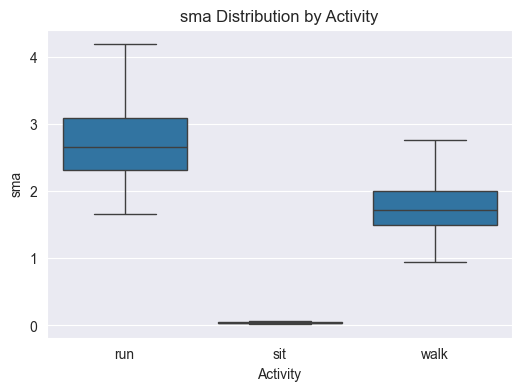

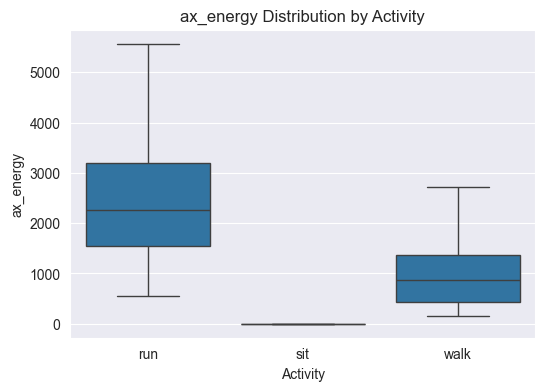

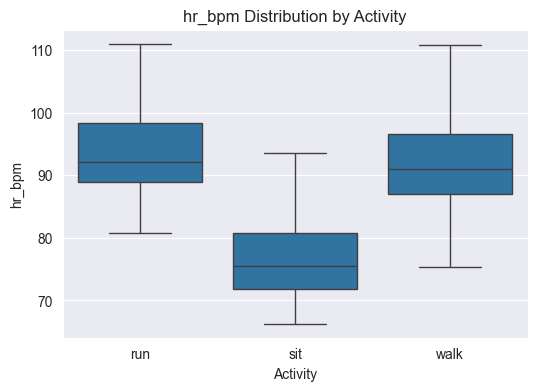

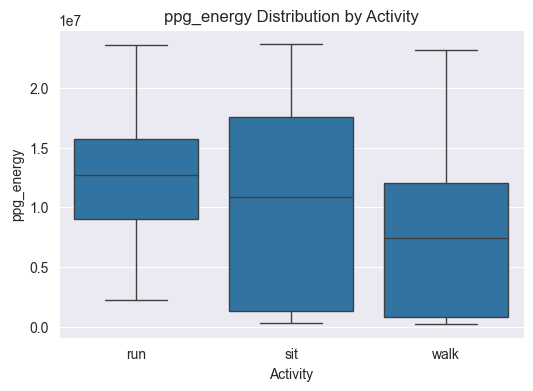

In [6]:
#
# ==========================================
# FIGURE 8: Feature Distributions by Activity
# ==========================================

selected_features = [
    "sma",
    "ax_energy",
    "hr_bpm",
    "ppg_energy"
]

for feature in selected_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=fused_df,
        x="activity",
        y=feature,
        showfliers=False
    )
    plt.title(f"{feature} Distribution by Activity")
    plt.xlabel("Activity")
    plt.ylabel(feature)
    plt.show()



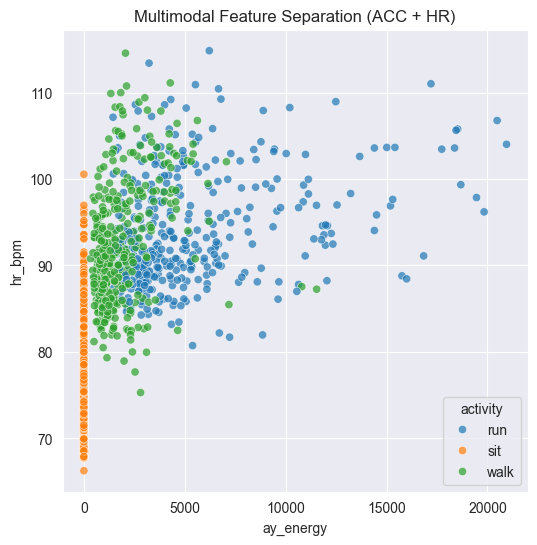

In [11]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=fused_df,
    x="ay_energy",
    y="hr_bpm",
    hue="activity",
    alpha=0.7
)
plt.title("Multimodal Feature Separation (ACC + HR)")
plt.show()



In [8]:
#manova
manova_features = fused_df[
    ["ax_std", "ay_std", "az_std", "sma", "ax_energy", "hr_bpm", "ppg_energy"]
]

manova_df = pd.concat(
    [manova_features, fused_df["activity"]],
    axis=1
)

maov = MANOVA.from_formula(
    "ax_std + ay_std + az_std + sma + ax_energy + hr_bpm + ppg_energy ~ activity",
    data=manova_df
)

print(maov.mv_test())




                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF   F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda   0.0067 4.0000 1152.0000 42838.9576 0.0000
         Pillai's trace   0.9933 4.0000 1152.0000 42838.9576 0.0000
 Hotelling-Lawley trace 148.7464 4.0000 1152.0000 42838.9576 0.0000
    Roy's greatest root 148.7464 4.0000 1152.0000 42838.9576 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
          activity         Value  Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
            Wilks' lambda  0.0309 8.0000 2304.0000 1349.1862 0.0000
 

In [ ]:
#“MANOVA results indicate that physical activity has a statistically significant multivariate effect on accelerometer-derived features (Wilks’ λ = 0.046, p < 0.001), confirming strong separability between sit, walk, and run.”